<a href="https://colab.research.google.com/github/owencastleman/Data-219-Project/blob/main/4_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Traffic Accident Causes in New York

## Research Question:


*   Can we accurately predict the type of accidents based on the location in New York as well as the type of vehicle.



## Step 1: Getting Data


*   Traffic crash data with 24 rows of crash events. (https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes/resource/b5a431d2-4832-43a6-9334-86b62bdb033f)






In [ ]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
df = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes.csv')
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/21,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,3/26/22,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,6/29/22,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/21,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/21,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


## Step 2: Cleaning Data

Filtering:

*   Used bins to create ranges of time (in hours) instead of using the time of day.
*   Changed column names so they are more appealing and make better sense.
*   Dropped uneccesary columns that we did not need.
*   Dropped all rows where the cause of the accident was not: 'Following Too Closely', 'Failure to Yield Right-of-Way', 'Backing Unsafely'.
*   Filled the unknown values in some columns












In [1]:
df_clean = pd.read_csv('https://raw.githubusercontent.com/owencastleman/Data-219-Project/main/Clean%20CSV%20(1).csv')
df_clean.head()

NameError: name 'pd' is not defined

We also added a new column: Month of Crash

In [ ]:
df_clean['Month of Crash'] = df_clean['Date of Crash'].str.split('/', expand = True)[0]
df_clean.head()

,Unnamed: 0,Date of Crash,Time of Crash,Neighborhood,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,Street,CROSS STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Cause of Crash,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Month of Crash
0,19,12/14/21,2-3pm,Not Indicated,NaN,40.783268,-73.824850,"(40.783268, -73.82485)",WHITESTONE EXPRESSWAY,Not Indicated,...,0,0,0,0,0,Following Too Closely,4486537,Station Wagon/Sport Utility Vehicle,Sedan,12
1,20,12/11/21,4-5am,MANHATTAN,10001.0,40.748917,-73.993546,"(40.748917, -73.993546)",Not Indicated,Not Indicated,...,0,0,0,0,0,Following Too Closely,4486905,Station Wagon/Sport Utility Vehicle,NaN,12
2,57,4/12/22,7-8pm,BROOKLYN,11203.0,40.650110,-73.930214,"(40.65011, -73.930214)",UTICA AVENUE,SNYDER AVENUE,...,0,0,0,0,0,Failure to Yield Right-of-Way,4522136,Station Wagon/Sport Utility Vehicle,NaN,4
3,71,12/8/21,4-5pm,MANHATTAN,10128.0,40.776237,-73.943825,"(40.776237, -73.943825)",EAST END AVENUE,EAST 88 STREET,...,0,0,0,0,0,Failure to Yield Right-of-Way,4485234,Taxi,Station Wagon/Sport Utility Vehicle,12
4,76,12/9/21,8-9am,Not Indicated,NaN,40.569626,-74.190735,"(40.569626, -74.190735)",WEST SHORE EXPRESSWAY,Not Indicated,...,0,0,0,0,0,Following Too Closely,4485214,Sedan,Station Wagon/Sport Utility Vehicle,12


## Step 3: Exploring the Data

Used Geolocation data to provide visualizations of the Crashes all around new york city

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
df_geo = gpd.GeoDataFrame(df_clean, geometry = gpd.points_from_xy(df_clean.LONGITUDE, df_clean.LATITUDE))

In [ ]:
df_clean[['LATITUDE','LONGITUDE']]

,LATITUDE,LONGITUDE
0,40.783268,-73.824850
1,40.748917,-73.993546
2,40.650110,-73.930214
3,40.776237,-73.943825
4,40.569626,-74.190735
...,...,...
36332,40.749084,-73.802820
36333,40.829820,-73.940575
36334,40.862800,-73.845390
36335,40.844340,-73.903590


# Map of NYC

<ipython-input-12-488fd64b6d36>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')




(120121.8812543372, 272844.2936401367)

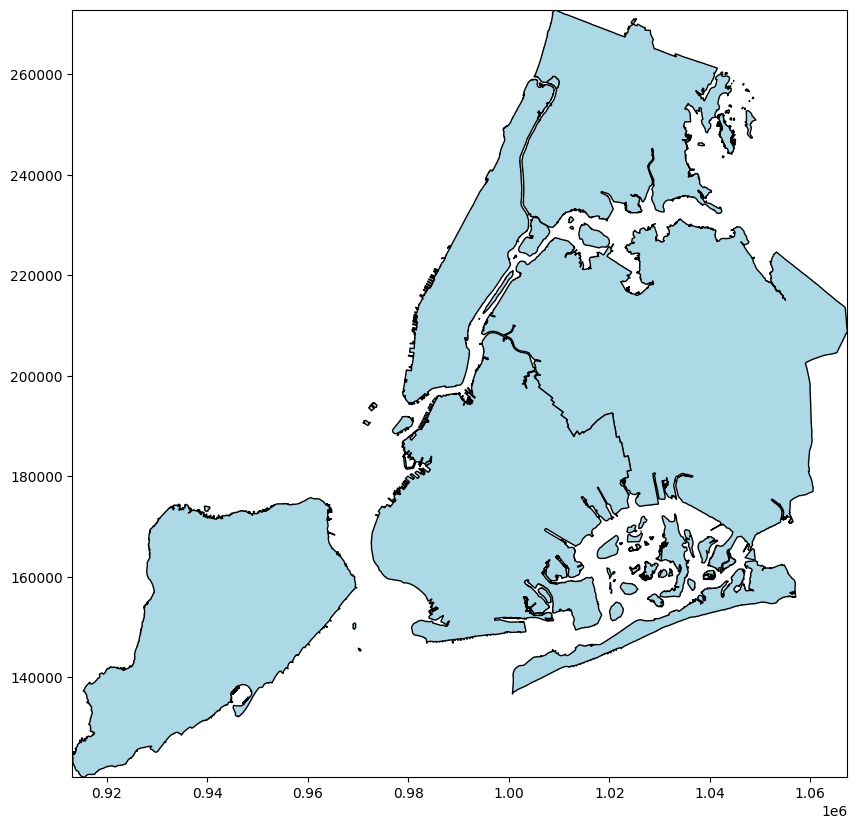

In [ ]:
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))
df_geo = df_geo[(df_geo['LATITUDE'] != 0) & (df_geo['LONGITUDE'] != 0)]
fig, ax = plt.subplots(figsize=(10, 10))
nyc_map.plot(ax=ax, color='lightblue', edgecolor='black')
plt.scatter(df_geo['LONGITUDE'], df_geo['LATITUDE'], color='red', s=10, label='Crashes')
ax.set_xlim(nyc_map.total_bounds[0], nyc_map.total_bounds[2])
ax.set_ylim(nyc_map.total_bounds[1], nyc_map.total_bounds[3])

Map Showing the Coordinates of all of the crashes in NYC. Note: just don't even drive in NYC, crashes are everywhere.

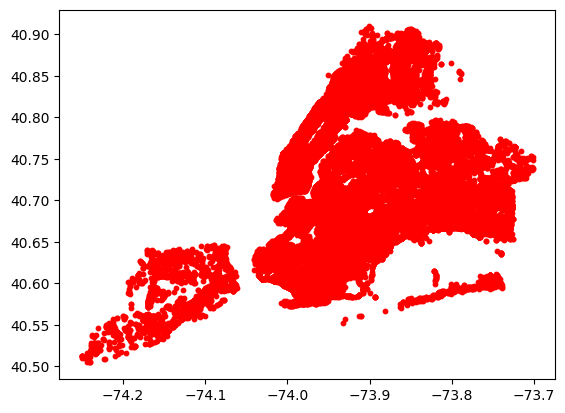

In [ ]:
plt.scatter(df_geo['LONGITUDE'], df_geo['LATITUDE'], color='red',s=10, label='Crashes')

Plot showing the different types of crashes across the city, also showing where the crashes with unknown locations are.

In [ ]:
import plotly.express as px
fig = px.scatter(x = df_geo['LONGITUDE'], y = df_geo['LATITUDE'], color = df_geo['Neighborhood'],
           labels={'x':'Longitude', 'y':'Latitude','color':'Neighborhood'},
           title='Coordinates of Crashes in New York City')
fig.update_traces(marker = {'size':4})

Plot Showing trhe different crashes in each neighborhood.

In [ ]:
fig = px.scatter(x = df_geo['LONGITUDE'], y = df_geo['LATITUDE'], color = df_geo['Cause of Crash'], facet_col = df_geo['Neighborhood'],
           labels={'x':'Longitude', 'y':'Latitude','color':'Neighborhood'},
           title='Coordinates of Crashes in New York City')
fig.update_traces(marker = {'size':2})

Finding the best columns to use in our model using chi squared test:

In [ ]:
import scipy.stats as stats
select_data = [['VEHICLE TYPE CODE 2','Cause of Crash']]
cross = pd.crosstab(df_clean['VEHICLE TYPE CODE 2'], df_clean['Cause of Crash'])
cross_test = stats.chi2_contingency(cross)
cross_test

In [ ]:
select_data = df_clean[['Street','Cause of Crash']]
cross = pd.crosstab(select_data['Street'], select_data['Cause of Crash'])
cross_test = stats.chi2_contingency(cross)
cross_test

Chi2ContingencyResult(statistic=22790.458720668474, pvalue=0.0, dof=8704, expected_freq=array([[ 9.39951014, 19.15939676, 16.4410931 ],
       [ 8.35512013, 17.0305749 , 14.61430498],
       [ 0.62663401,  1.27729312,  1.09607287],
       ...,
       [ 0.208878  ,  0.42576437,  0.36535762],
       [ 0.208878  ,  0.42576437,  0.36535762],
       [ 0.208878  ,  0.42576437,  0.36535762]]))

In [ ]:
select_data = df_clean[['Neighborhood','Cause of Crash']]
cross = pd.crosstab(select_data['Neighborhood'], select_data['Cause of Crash'])
cross_test = stats.chi2_contingency(cross)
cross_test

Chi2ContingencyResult(statistic=3093.9914790220564, pvalue=0.0, dof=10, expected_freq=array([[ 763.86685747, 1557.02030988, 1336.11283265],
       [1576.40228968, 3213.24371852, 2757.3539918 ],
       [ 737.96598508, 1504.2255277 , 1290.80848722],
       [2661.52351598, 5425.08963316, 4655.38685087],
       [1661.62451496, 3386.95558246, 2906.41990258],
       [ 188.61683683,  384.46522828,  329.91793489]]))

Based on the chi squared test, the p-values are all 0 for each of these features which is below .05, and leads us to believe that there is a correlation between the second car's make, the street, neighborhood and the type of crash that occurred.

## Machine Learning Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train = df_clean[['VEHICLE TYPE CODE 2', 'Street', 'Neighborhood']]
Y_train = df_clean['Cause of Crash']

pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    DecisionTreeClassifier(random_state=0)
)
scores = cross_val_score(
    pipeline,
    X=X_train,
    y=Y_train,
    scoring='f1_macro',
    cv=5
)
scores.mean()

0.5792019116634262

* Because the data we are using in this model is categorical, we are using f1 macro for scoring and a cv of 5 to test 5 fits.

* Our f1 score of 0.579 suggests that our decision tree model, when evaluated using 5-fold cv and the f1 macro score metric, achieves moderate performance in terms of overall accuracy and balance between precision and recall across the three different types/causes of crashes.


### Further Evaluation



*   We created a confusion matrix in order to test how well our model is performing across all classes



In [ ]:
from sklearn.metrics import confusion_matrix

pipeline.fit(X_train, Y_train)
y_train_ = pipeline.predict(X_train)
confusion_matrix(Y_train, y_train_)

pd.DataFrame(
    confusion_matrix(Y_train, y_train_),
    index=pipeline.classes_,
    columns=pipeline.classes_
)

,Backing Unsafely,Failure to Yield Right-of-Way,Following Too Closely
Backing Unsafely,6700,568,322
Failure to Yield Right-of-Way,1943,12339,1189
Following Too Closely,1988,1899,9389


Interpretation:


*   Backing Unsafely was correctly predicted 6700 times out of 7590, incorrectly predicted 568 times as Failure to Yield Right-of-Way, and incorrectly predicted 322 times as Following Too Closely.
*   Failure to Yield Right-of-Way was incorrectly predicted 1943 times as Backing Unsafely, correctly predicted 12339 times out of 15471, and incorrectly predicted 1189 times as Following Too Closely.
*   Following Too Closely was incorrectly predicted 1988 times as Backing Unsafely, incorrectly predicted 1899 times as Failure to Yield RIght-of-Way, and correctly predicted 9389 times out of 13276.




